<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/highUtilityPattern/basic/EFIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding High Utility Patterns in Utility Databases using EFIM

This tutorial has two parts. In the first part, we describe the basic approach to find High Utility Patterns in a Utility database using the EFIM algorithm. In the final part, we describe an advanced approach, where we evaluate the EFIM algorithm on a dataset at different minimum utility threshold values.
***

# Prerequisites:



1.   Installing the PAMI library

In [1]:
!pip install -U pami #install the pami repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.0/835.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=bf37f8492c7df266003b1f49c647aa007eb1d4ddd04ddd6286b78382ed255149
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4750 sha256=477fba4fc28114bafe3807f34fad71a809c1df87fab86848c835aa0047755961
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


2.   Downloading a sample dataset

In [2]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv #download a sample utility database

--2023-09-05 11:16:09--  https://u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7356594 (7.0M) [text/csv]
Saving to: ‘Utility_T10I4D100K.csv’

Utility_T10I4D100K. 100%[===================>]   7.02M  1.82MB/s    in 6.0s    

2023-09-05 11:16:17 (1.16 MB/s) - ‘Utility_T10I4D100K.csv’ saved [7356594/7356594]



3.   Printing few lines of a dataset to know its format.

In [3]:
!head -2 Utility_T10I4D100K.csv

25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834:852:25	96	32	50	20	80	48	58	75	86	64	57	16	14	46	85 
39	120	124	205	401	581	704	814	825	834:396:6	60	42	58	31	53	10	52	22	62 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding High Utility Patterns using EFIM

### Step 1: Understanding the statistics of a database to choose an appropriate minimum Support (minSup) value.

In [4]:
#import the class file
import PAMI.extras.dbStats.utilityDatabaseStats as stats

#specify the file name
inputFile = 'Utility_T10I4D100K.csv'

#initialize the class
obj=stats.utilityDatabaseStats(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 99935
Total number of items : 870
Database sparsity : 0.9883886940304302
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

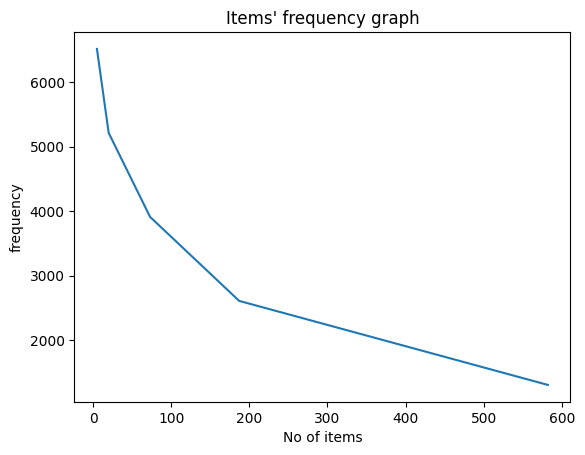

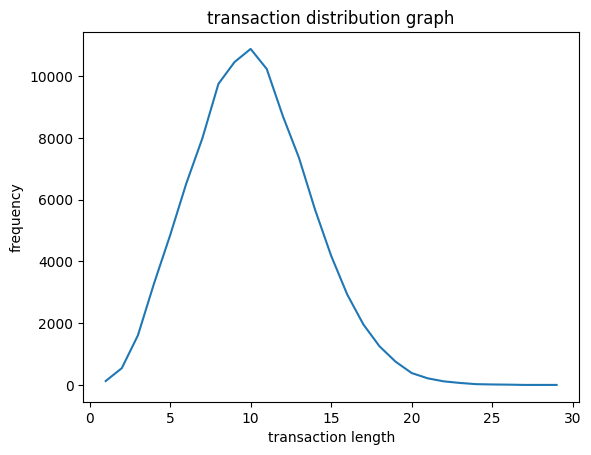

In [5]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minSup* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minSup_ value of 100 (in count). We can increase or decrease the _minSup_ based on the number of patterns being generated.

In [6]:
minUtilCount=10000  #minUtilCount is specified in count. However, the users can also specify minUtilCount between 0 and 1.

### Step 4: Mining High Utility Patterns using EFIM

In [7]:
from PAMI.highUtilityPattern.basic import EFIM  as alg#import the algorithm

obj = alg.EFIM(iFile=inputFile, minUtil=minUtilCount, sep='\t') #initialize
obj.startMine()            #start the mining process

obj.save('utilityFrequentPatternsAtMinUtilCount10000.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

High Utility patterns were generated successfully using EFIM algorithm
Total No of patterns: 42179
Runtime: 198.55195021629333
Memory (RSS): 250949632
Memory (USS): 202461184


### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minUtil_ value.

In [8]:
!head 'utilityFrequentPatternsAtMinUtilCount10000.txt'

959	865	203	948	513	90	196:10448 
959	865	203	948	513	90	196	236:12039 
959	865	203	948	513	90	196	236	937:13795 
959	865	203	948	513	90	196	937:12204 
959	865	203	948	513	90	236:10553 
959	865	203	948	513	90	236	937:12309 
959	865	203	948	513	90	937:10718 
959	865	203	948	513	196	236:10721 
959	865	203	948	513	196	236	937:12477 
959	865	203	948	513	196	937:10886 


The storage format is: _highUtilityPattern:support_
***

## Part 2: Evaluating the EFIM algorithm on a dataset at different minUtilCount values

### Step 1: Import the libraries and specify the input parameters

In [9]:
#Import the libraries
from PAMI.highUtilityPattern.basic import EFIM  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Utility_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [10000, 20000, 30000, 40000, 50000]
#minimumSupportCountList can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of EFIM

In [10]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of EFIM algorithm

### Step 3: Execute the algorithm at different minUtil values

In [11]:
for minSup in minimumSupportCountList:
    obj = alg.EFIM(inputFile, minUtil=minSup, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['EFIM', minSup, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

High Utility patterns were generated successfully using EFIM algorithm
High Utility patterns were generated successfully using EFIM algorithm
High Utility patterns were generated successfully using EFIM algorithm
High Utility patterns were generated successfully using EFIM algorithm
High Utility patterns were generated successfully using EFIM algorithm


### Step 4: Print the Result

In [12]:
print(result)

  algorithm  minSup  patterns     runtime     memory
0      EFIM   10000     42179  202.255634  265764864
1      EFIM   20000     23299  171.874240  256344064
2      EFIM   30000     14468  167.071229  250052608
3      EFIM   40000      9408  159.263006  250052608
4      EFIM   50000      5968  152.700212  249004032


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

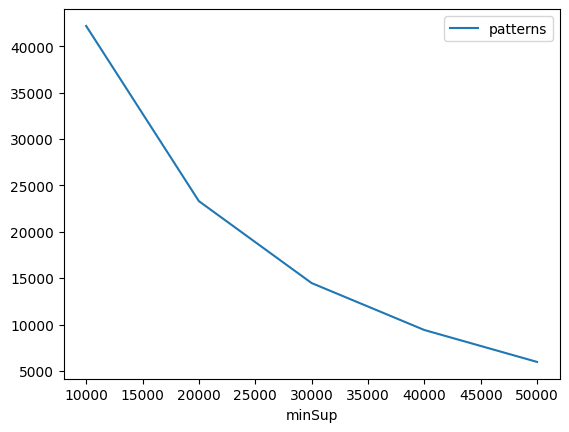

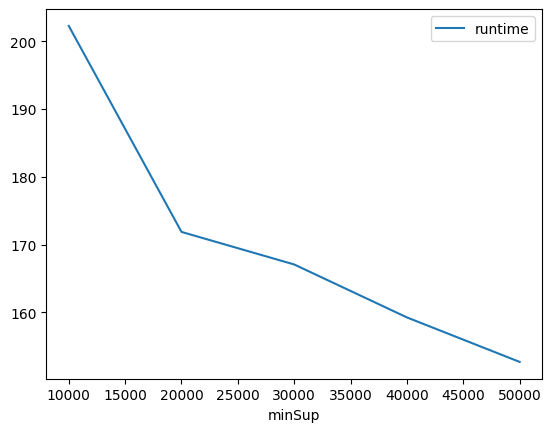

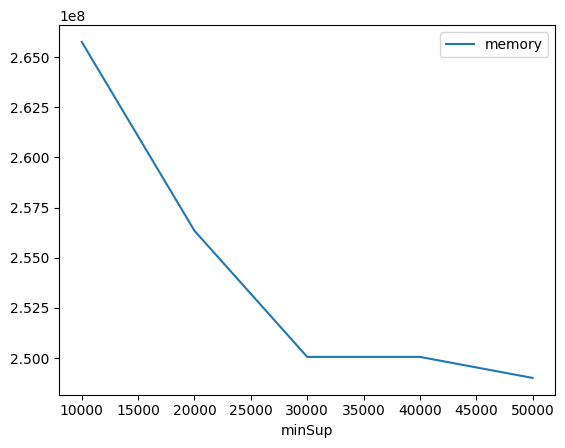

In [13]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib